This project includes a manual implementation of linear regression.

Import relevant Python libraries

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

Generate data for linear regression

In [110]:
m = 1000 # number of instances
n = 5 # number of features
np.random.seed(42)
X = np.random.randn(m,n)
w_true = np.random.uniform(low=-10, high = 10, size = n)
y = np.matmul(X,w_true) + np.random.randn(m)

print(f'The true weight vector is {w_true}.')

The true weight vector is [-6.63526842 -6.20130513 -0.78575657 -4.27440276 -5.05074038].


Create dataframe from the generated data

In [111]:
feature_columns = [f'Feature{j+1}' for j in range(n)]
df = pd.DataFrame(X, columns = feature_columns)
df['Target'] = y
print(df.head())

   Feature1  Feature2  Feature3  Feature4  Feature5     Target
0  0.496714 -0.138264  0.647689  1.523030 -0.234153  -6.930415
1 -0.234137  1.579213  0.767435 -0.469474  0.542560  -8.282984
2 -0.463418 -0.465730  0.241962 -1.913280 -1.724918  22.351804
3 -0.562288 -1.012831  0.314247 -0.908024 -1.412304  22.007125
4  1.465649 -0.225776  0.067528 -1.424748 -0.544383   0.288374


Look at summary statistics for the data

In [112]:
print(df.describe())

          Feature1     Feature2     Feature3     Feature4     Feature5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.001297    -0.017207     0.004543     0.006531     0.032846   
std       0.999219     1.029248     1.005321     0.959842     0.988835   
min      -3.170426    -2.940389    -3.241267    -3.007632    -3.176704   
25%      -0.645736    -0.711821    -0.693862    -0.649871    -0.607606   
50%       0.027885    -0.034162     0.022395     0.064768    -0.006855   
75%       0.649413     0.663808     0.642029     0.679256     0.690789   
max       3.926238     3.243093     3.152057     3.078881     3.852731   

            Target  
count  1000.000000  
mean     -0.162806  
std      11.254000  
min     -35.161263  
25%      -7.167280  
50%      -0.344376  
75%       7.444116  
max      42.588318  


Visualize the data

array([[<Axes: title={'center': 'Feature1'}>,
        <Axes: title={'center': 'Feature2'}>],
       [<Axes: title={'center': 'Feature3'}>,
        <Axes: title={'center': 'Feature4'}>],
       [<Axes: title={'center': 'Feature5'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

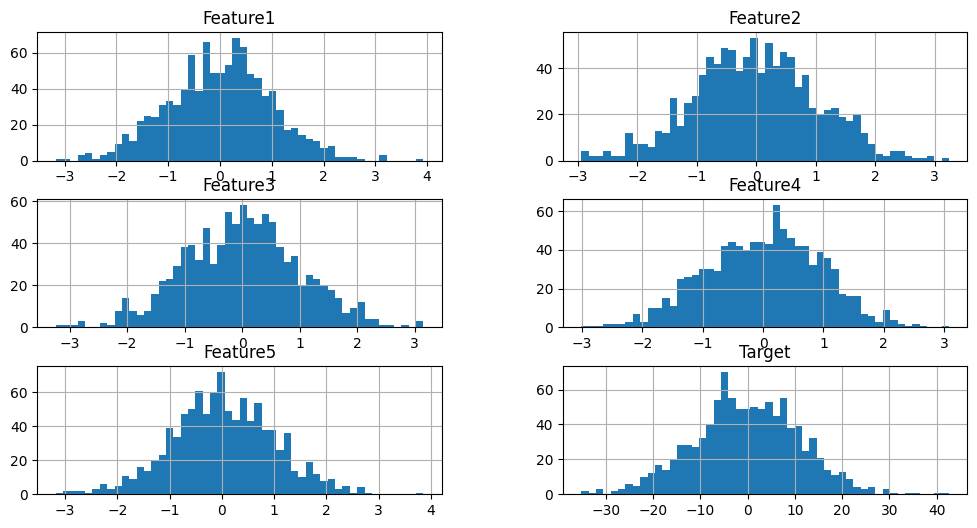

In [113]:
df.hist(bins=50,figsize=(12,6))

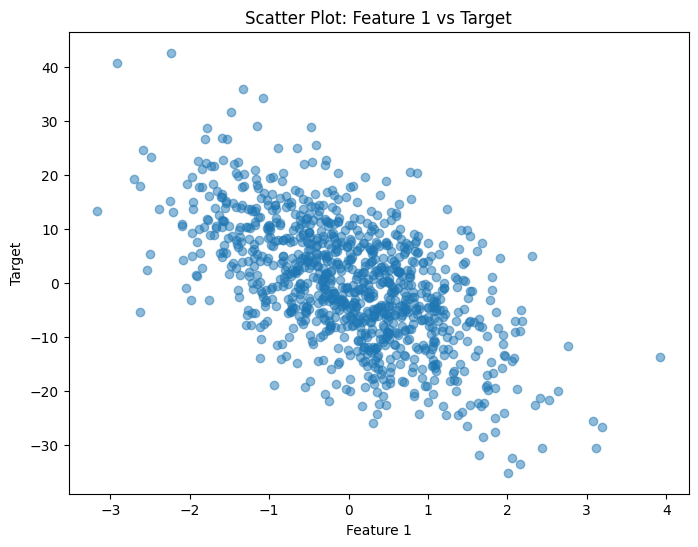

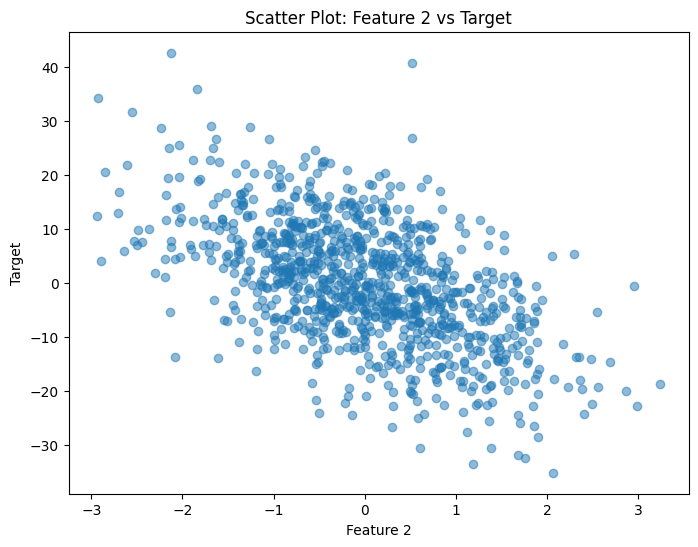

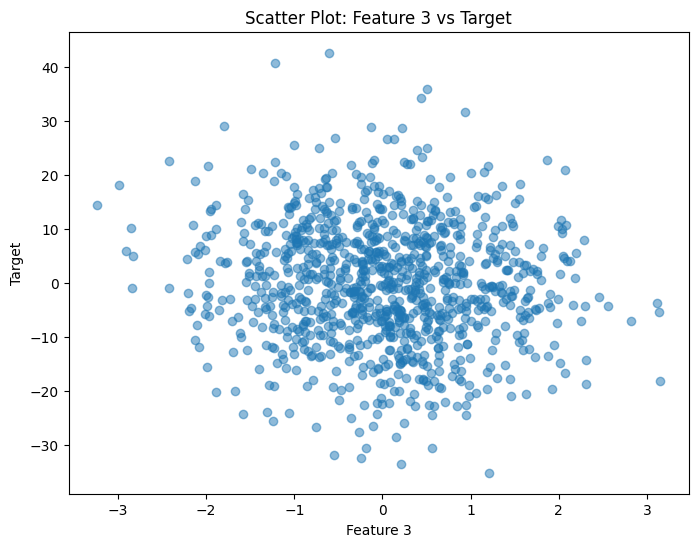

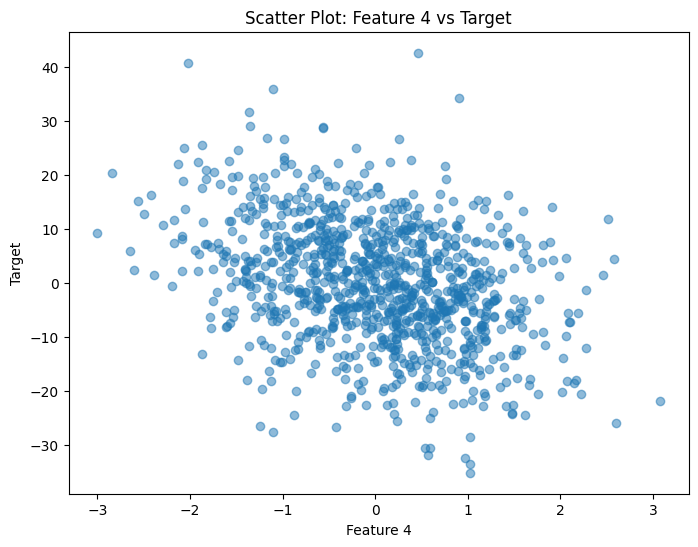

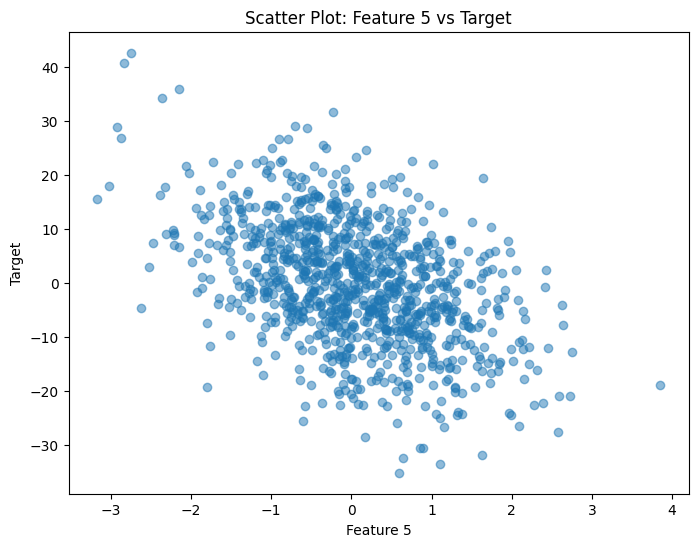

In [114]:
for j in range(n):
  plt.figure(figsize=(8,6))
  plt.scatter(X[:,j], y, alpha=0.5)
  plt.xlabel(f'Feature {j+1}')
  plt.ylabel('Target')
  plt.title(f'Scatter Plot: Feature {j+1} vs Target')
  plt.show()

Define a function to split data into training set and testing set

In [130]:
def split_data(data,test_ratio):
  np.random.seed(42)
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices].copy(), data.iloc[test_indices].copy()

Split the data into training and testing sets

In [131]:
df_train, df_test = split_data(df,0.2)
print(len(df_train))
print(len(df_test))

800
200


Defining feature and target variables for training and testing sets.

In [132]:
X_train = df_train[feature_columns]
X_test = df_test[feature_columns]
y_train = df_train['Target']
y_test = df_test['Target']

Initialize the model

In [133]:
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
w_initial = np.zeros(X_train_np.shape[1])
b_initial = 0

Optimize the weights w and b via gradient descent

First step is to define the loss function

In [134]:
def compute_loss(y_true,y_pred):
  return np.mean((y_pred - y_true)**2)

Define function to make prediction with given weights

In [135]:
def make_prediction(X,w,b):
  return np.matmul(X,w) + b

In [136]:
def compute_gradient(X,y,w,b):
  m = X.shape[0]
  y_pred = make_prediction(X,w,b)

  dw = (2/m) * np.matmul(X.T,y_pred - y)
  db = (2/m) * np.sum(y_pred - y)
  return dw, db

Gradient descent algorithm

In [137]:
def grad_descent(X,y,w_init,b_init,alpha,tol,max_allow_iter):
  losses = []
  iter = 0
  w = w_init
  b = b_init

  y_pred = make_prediction(X,w,b)
  prev_loss = compute_loss(y,y_pred)

  while iter < max_allow_iter:
    dw, db = compute_gradient(X,y,w,b)

    w -= alpha * dw
    b -= alpha * db

    y_pred = make_prediction(X,w,b)
    loss = compute_loss(y,y_pred)
    losses.append(loss)

    if abs(prev_loss - loss) < tol:
      print(f'Gradient descent converged at prescribed tolerance at iteration {iter+1}')
      return w, b, losses, iter+1

    prev_loss = loss
    iter += 1


  print('Gradient descent exceeded maximum number of allowed iterations.')

  return w, b, losses, iter+1






Run gradient descent to compute the optimized weights

In [138]:
w,b,losses,grad_descent_iter = grad_descent(X_train_np,y_train_np,w_initial,b_initial,0.01,1e-8,10000)
print(w)
print(b)

Gradient descent converged at prescribed tolerance at iteration 520
[-6.62107813 -6.16613727 -0.77855021 -4.32567972 -5.0899899 ]
-0.07077229237240908


Evaluate gradient descent by visualizing loss

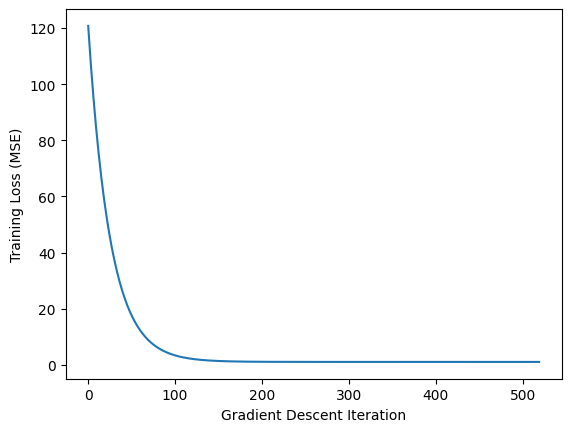

In [139]:
plt.plot(range(len(losses)),losses)
plt.xlabel('Gradient Descent Iteration')
plt.ylabel('Training Loss (MSE)')
plt.show()

Compare true weights vs those computed via gradient descent

In [144]:
print(f'The true weights: {w_true}.')
print(f'The weights computed via gradient descent: {w}')
print(f'The bias computed via gradient descent: {b}')

The true weights: [-6.63526842 -6.20130513 -0.78575657 -4.27440276 -5.05074038].
The weights computed via gradient descent: [-6.62107813 -6.16613727 -0.77855021 -4.32567972 -5.0899899 ]
The bias computed via gradient descent: -0.07077229237240908


Check performance on training data

In [125]:
y_pred_train = make_prediction(X_train_np,w,b)
loss_train = compute_loss(y_pred_train,y_train)
print(f'Loss on training data: {loss_train}')

Loss on training data: 1.064780286415679


In [ ]:
Visualize results on training data

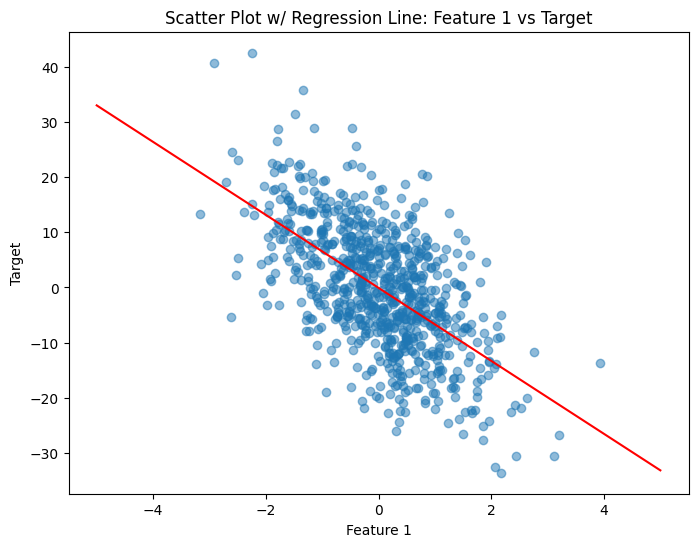

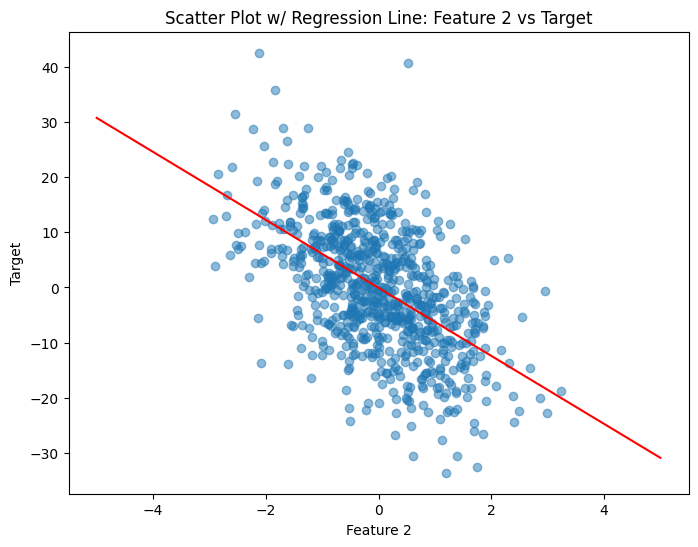

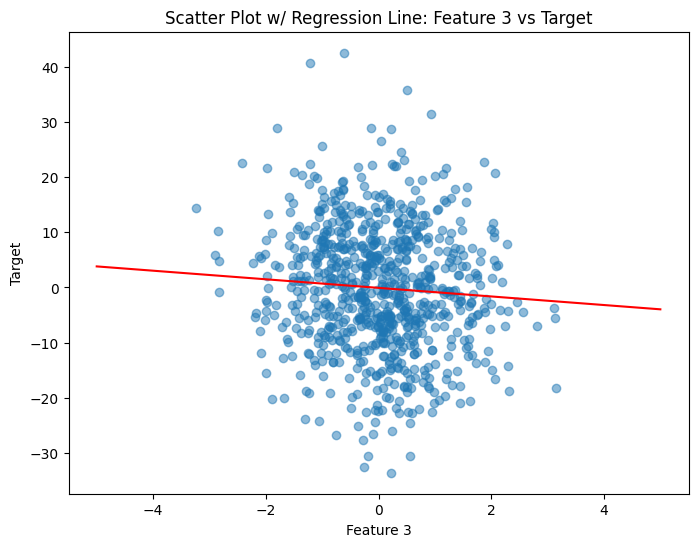

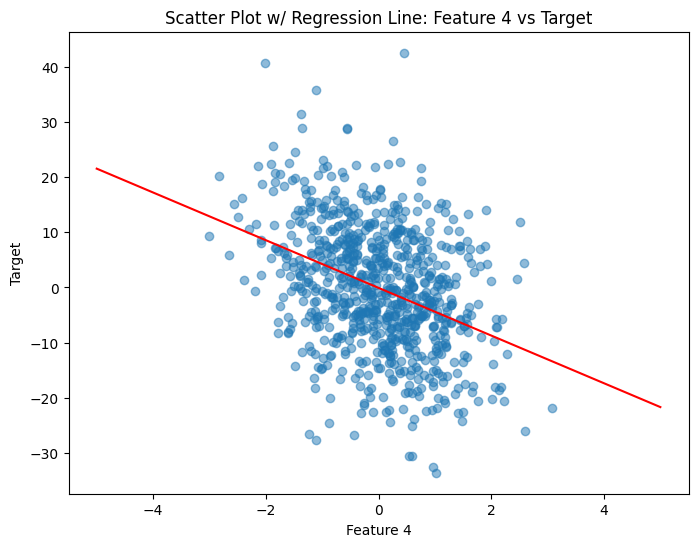

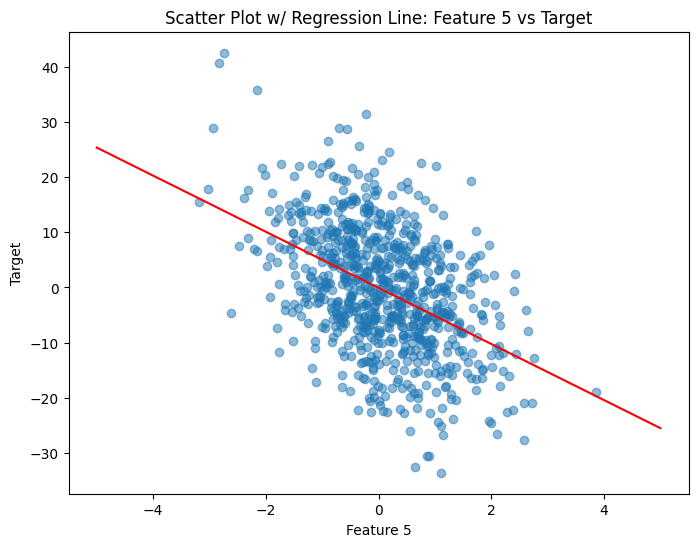

In [140]:
x = np.linspace(-5,5,num=100)
for j in range(n):
  plt.figure(figsize=(8,6))
  plt.scatter(X_train_np[:,j], y_train_np, alpha=0.5)
  plt.plot(x,w[j]*x + b,color='red')
  plt.xlabel(f'Feature {j+1}')
  plt.ylabel('Target')
  plt.title(f'Scatter Plot w/ Regression Line: Feature {j+1} vs Target')
  plt.show()

Make predictions on the testing data

In [141]:
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)
y_pred_test = make_prediction(X_test_np,w,b)
loss_test = compute_loss(y_pred_test,y_test)
print(f'Loss on testing data: {loss_test}')

Loss on testing data: 1.0992465727168264


Compute finer measurements of the error on the testing data

In [142]:
rmse = np.sqrt(loss_test)
r2 = r2_score(y_test,y_pred_test)
nrmse = rmse/(y_test.max()-y_test.min())
print(f'The RMSE on the testing data: {rmse}')
print(f'The Coefficient of Determination R^2 on the testing data: {r2}')
print(f'The range-normalized RMSE on the testing data: {nrmse}')

The RMSE on the testing data: 1.0484496042809242
The Coefficient of Determination R^2 on the testing data: 0.9915620209775065
The range-normalized RMSE on the testing data: 0.015119413202370063


Visualize results on the testing data

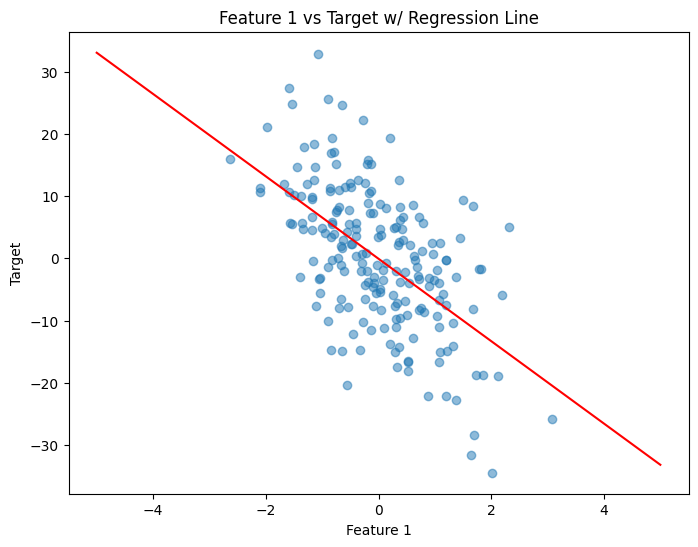

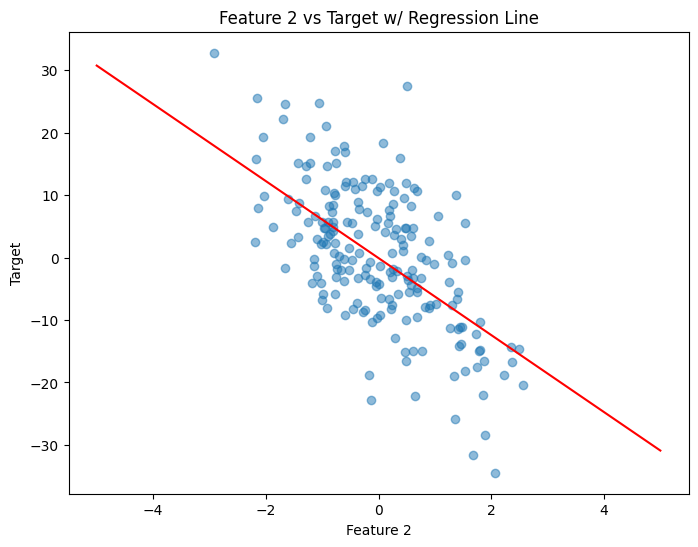

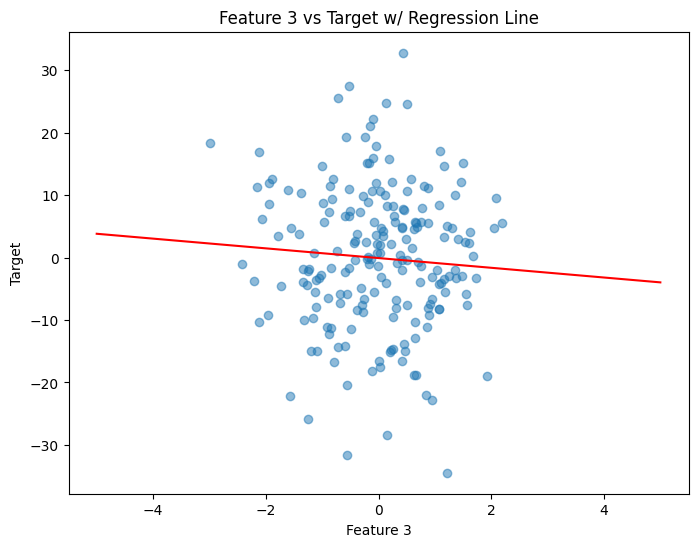

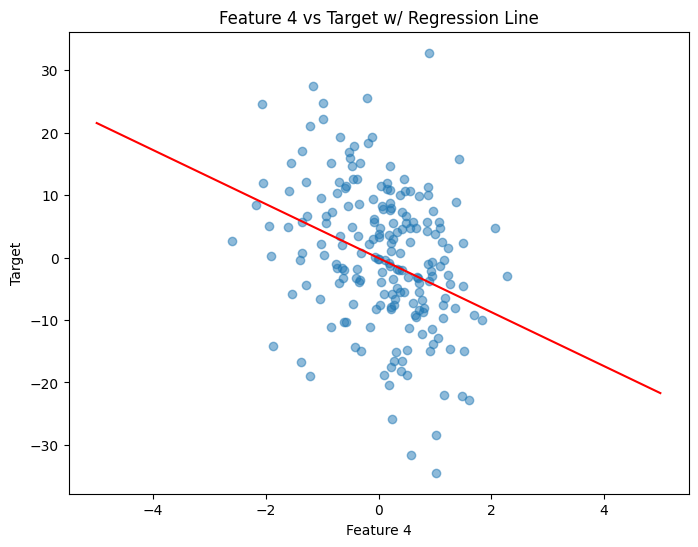

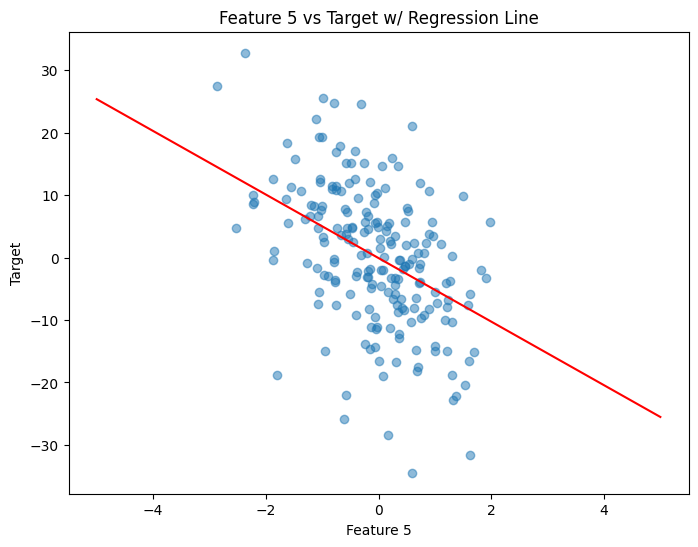

In [143]:
for j in range(n):
  plt.figure(figsize=(8,6))
  plt.scatter(X_test_np[:,j],y_pred_test,alpha=0.5)
  plt.plot(x,w[j]*x + b, color='red')
  plt.xlabel(f'Feature {j+1}')
  plt.ylabel('Target')
  plt.title(f'Feature {j+1} vs Target w/ Regression Line')
  plt.show()